# Real time pollution analysis

#  api : http://api.waqi.info/
# api key: 2d4c9cb7049e7c6d411f900167d3bbf5d410e5d5

In [2]:
import requests

In [3]:
#requesting api
name = 'India'
url = 'http://api.waqi.info/feed/' + name + '/?token='
api_key = '2d4c9cb7049e7c6d411f900167d3bbf5d410e5d5'

In [4]:
main_url = url + api_key
r = requests.get(main_url)
data = r.json()
data

{'status': 'ok',
 'data': {'aqi': 83,
  'idx': 11318,
  'attributions': [{'url': 'http://cpcb.nic.in/',
    'name': 'CPCB - India Central Pollution Control Board',
    'logo': 'India-CPCB.png'},
   {'url': 'https://waqi.info/', 'name': 'World Air Quality Index Project'}],
  'city': {'geo': [28.725645, 77.749675],
   'name': 'Anand Vihar, Hapur, India',
   'url': 'https://aqicn.org/city/india/hapur/anand-vihar'},
  'dominentpol': 'pm25',
  'iaqi': {'co': {'v': 2.9},
   'dew': {'v': 20},
   'h': {'v': 47.75},
   'o3': {'v': 0.9},
   'p': {'v': 740},
   'pm10': {'v': 60},
   'pm25': {'v': 83},
   'so2': {'v': 3.9},
   't': {'v': 28.924999999999997},
   'w': {'v': 0.3},
   'wg': {'v': 12.8}},
  'time': {'s': '2020-06-06 20:00:00', 'tz': '+05:30', 'v': 1591473600},
  'debug': {'sync': '2020-06-07T00:36:59+09:00'}}}

# EDA

In [5]:
#extracting smaller 'data' dictionary from data(json)
main_url = url + api_key
r = requests.get(main_url)
data = r.json()['data']
data

{'aqi': 83,
 'idx': 11318,
 'attributions': [{'url': 'http://cpcb.nic.in/',
   'name': 'CPCB - India Central Pollution Control Board',
   'logo': 'India-CPCB.png'},
  {'url': 'https://waqi.info/', 'name': 'World Air Quality Index Project'}],
 'city': {'geo': [28.725645, 77.749675],
  'name': 'Anand Vihar, Hapur, India',
  'url': 'https://aqicn.org/city/india/hapur/anand-vihar'},
 'dominentpol': 'pm25',
 'iaqi': {'co': {'v': 2.9},
  'dew': {'v': 20},
  'h': {'v': 47.75},
  'o3': {'v': 0.9},
  'p': {'v': 740},
  'pm10': {'v': 60},
  'pm25': {'v': 83},
  'so2': {'v': 3.9},
  't': {'v': 28.924999999999997},
  'w': {'v': 0.3},
  'wg': {'v': 12.8}},
 'time': {'s': '2020-06-06 20:00:00', 'tz': '+05:30', 'v': 1591473600},
 'debug': {'sync': '2020-06-07T00:36:59+09:00'}}

In [9]:
#Extracting AQI
aqi = data['aqi']
print("Aqi of india is=" ,aqi)

Aqi of india is= 83


In [13]:
#Extracting pollutants
iaqi = data['iaqi']
print(" Pollutants: ", iaqi)

 Pollutants:  {'co': {'v': 2.9}, 'dew': {'v': 20}, 'h': {'v': 47.75}, 'o3': {'v': 0.9}, 'p': {'v': 740}, 'pm10': {'v': 60}, 'pm25': {'v': 83}, 'so2': {'v': 3.9}, 't': {'v': 28.924999999999997}, 'w': {'v': 0.3}, 'wg': {'v': 12.8}}


In [14]:
for i in iaqi.items():
    print(i[0],':',i[1]['v'])

co : 2.9
dew : 20
h : 47.75
o3 : 0.9
p : 740
pm10 : 60
pm25 : 83
so2 : 3.9
t : 28.924999999999997
w : 0.3
wg : 12.8


In [15]:
#Deleting some pollutants
del iaqi['t']
del iaqi['w']

In [20]:
del iaqi['p']
del iaqi['wg']

In [21]:
iaqi

{'co': {'v': 2.9},
 'dew': {'v': 20},
 'h': {'v': 47.75},
 'o3': {'v': 0.9},
 'pm10': {'v': 60},
 'pm25': {'v': 83},
 'so2': {'v': 3.9}}

In [19]:
for i in iaqi.items():
    print(i[0],':',i[1]['v'])

co : 2.9
dew : 20
h : 47.75
o3 : 0.9
p : 740
pm10 : 60
pm25 : 83
so2 : 3.9
wg : 12.8


In [25]:
dew = iaqi.get('dew')
o3 = iaqi.get('o3')
so2 = iaqi.get('so2')
pm10 = iaqi.get('pm10')
pm25 = iaqi.get('pm25')
co= iaqi.get('co')
h= iaqi.get('h')



print(f'{name} AQI :',aqi,'\n')
print('Individual Air quality')
print('Dew :',dew)
print('ozone :',o3)
print('sulphur di-oxide :',so2)
print('pm10 :',pm10)
print('pm2.5 :',pm25)
print('carbon monoxide :',co)
print('hydrogen :', h)

India AQI : 83 

Individual Air quality
Dew : {'v': 20}
ozone : {'v': 0.9}
sulphur di-oxide : {'v': 3.9}
pm10 : {'v': 60}
pm2.5 : {'v': 83}
carbon monoxide : {'v': 2.9}
hydrogen : {'v': 47.75}


# Plotting graphs/charts to better analyse the pollutants data

In [42]:
#pollutant graph/chart

import matplotlib as plt
%matplotlib inline

In [35]:
pollutants = [i for i in iaqi]
values = [i['v'] for i in iaqi.values()]

In [36]:
print(pollutants)

['co', 'dew', 'h', 'o3', 'pm10', 'pm25', 'so2']


In [37]:
print(values)

[2.9, 20, 47.75, 0.9, 60, 83, 3.9]


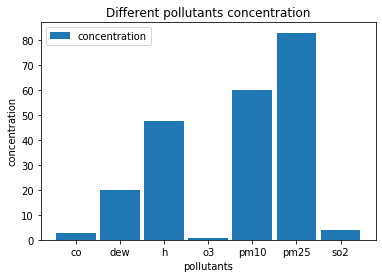

In [59]:
from matplotlib import pyplot as plt

# bar plot
plt.bar(pollutants,values,label="concentration",width=.9)

plt.legend()
plt.xlabel('pollutants')
plt.ylabel('concentration')
plt.title('Different pollutants concentration')

plt.show()

# Analysis: As clear with output pm2.5 with highest concentration is the dominant pollutant 

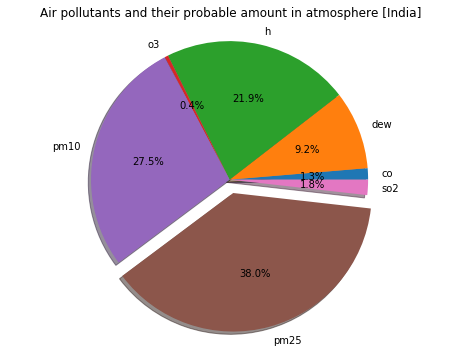

In [65]:
#plotting the pollutant data with the help of bar chart

pollutants = [i for i in iaqi]
values = [i['v'] for i in iaqi.values()]


# Exploding the first slice
explode = [0 for i in pollutants]
mx = values.index(max(values))  # explode 1st slice
explode[mx] = 0.1

# Plot a pie chart
plt.figure(figsize=(8,6))
plt.pie(values, labels=pollutants,explode=explode,autopct='%1.1f%%', shadow=True)

plt.title('Air pollutants and their probable amount in atmosphere [India]')

plt.axis('equal')
plt.show()

# showing INDIA AQI on world map using cartopy

In [82]:
import cartopy.crs as ccrs

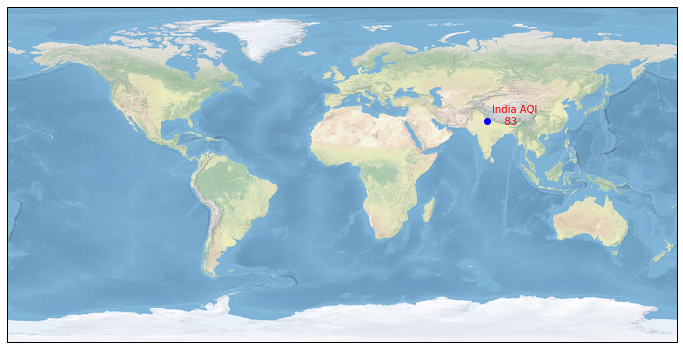

In [83]:
geo = data['city']['geo']

fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

plt.scatter(geo[1],geo[0],color='blue')
plt.text(geo[1] + 3,geo[0]-2,f'{name} AQI \n    {aqi}',color='red')

plt.show()